In [1]:
import numpy as np
from numpy import linalg as la
from matplotlib import pyplot as plt
from scipy.optimize import minimize
import random
import time
import pylab
from sklearn.datasets import load_svmlight_file
from scipy.sparse import csr_matrix

In [2]:
from functions import *
from algorithms import *

## Quadratic function

In [3]:
n = 30
k = 5
h = 5
kappa = 1000
communication_rounds = 100
arr_A, arr_b = generate_quadratic_functions(n, k, kappa)
x0 = np.zeros(n) + 100

In [4]:
def sigma(x):
        sigm = 0
        for i in range(k):
            sigm += quadratic_function(arr_A[i], arr_b[i], x);
        return sigm

In [5]:
params =[(arr_A[j], arr_b[j]) for j in range(k)]

In [6]:
x1_q, y1_q, time_arr1_q = noname_fun_one_to_all(sigma, x0, pseudo_grad_quadratic, grad_params = params, method = 'random direction', communication_rounds = 100, n = n, k = k, frq = n * h, lr = 1/kappa, delta = 0.001)
x2_q, y2_q, time_arr2_q = noname_fun_one_to_all(sigma, x0, pseudo_grad_quadratic, grad_params = params, method = 'random coordinate', communication_rounds = 100, n = n, k = k, frq = n * h, lr = 1/kappa, delta = 0.001)
x3_q, y3_q, time_arr3_q = noname_fun_one_to_one(sigma, x0, pseudo_grad_quadratic, grad_params = params, method = 'random direction', communication_rounds = 100, n = n, k = k, frq = n * h, lr = 1/kappa, delta = 0.001)
x4_q, y4_q, time_arr4_q = noname_fun_one_to_one(sigma, x0, pseudo_grad_quadratic, grad_params = params, method = 'random coordinate', communication_rounds = 100, n = n, k = k, frq = n * h, lr = 1/kappa, delta = 0.001)

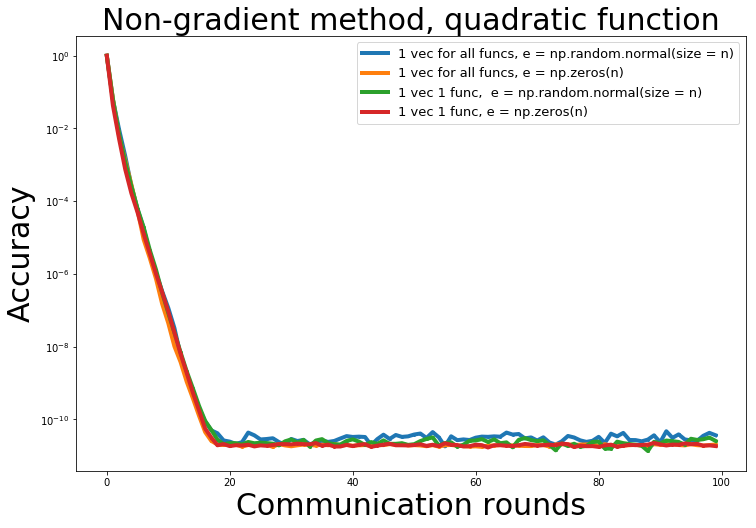

In [7]:
plt.figure(figsize=(12, 8))
plt.semilogy(x1_q, y1_q, linewidth = 4, label = '1 vec for all funcs, e = np.random.normal(size = n)', marker = '.', markersize = 4)
plt.semilogy(x2_q, y2_q, linewidth = 4, label = '1 vec for all funcs, e = np.zeros(n)', marker = '.', markersize = 4)
plt.semilogy(x3_q, y3_q, linewidth = 4, label = '1 vec 1 func,  e = np.random.normal(size = n)', marker = '.', markersize = 4)
plt.semilogy(x4_q, y4_q, linewidth = 4, label = '1 vec 1 func, e = np.zeros(n)', marker = '.', markersize = 4)
plt.legend(loc="best", fontsize=13)
plt.xlabel(r"Communication rounds", fontsize=30)
plt.ylabel(r"Accuracy", fontsize=30)
plt.title(r"Non-gradient method, quadratic function", fontsize=30)
plt.show()

## Nesterov function

In [8]:
L = 1
n = 50
k = 5
h = 5
communication_rounds = 100
x0 = np.zeros(n)

In [9]:
def sigma(x):
    sigm = 0
    for i in range(k):
        sigm += nesterov_function(x, i, L);
    return sigm

In [10]:
params = [(j, L) for j in range(k)]

In [11]:
x1_n, y1_n, time_arr1_n = noname_fun_one_to_all(sigma, x0, pseudo_grad_nesterov, grad_params = params, method = 'random direction', communication_rounds = 100, n = n, k = k,frq = n * h, lr = 0.25/L, delta = 0.001)
x2_n, y2_n, time_arr2_n = noname_fun_one_to_all(sigma, x0, pseudo_grad_nesterov, grad_params = params, method = 'random coordinate', communication_rounds = 100, n = n, k = k, frq = n * h, lr = 0.25/L, delta = 0.001)
x3_n, y3_n, time_arr3_n = noname_fun_one_to_one(sigma, x0, pseudo_grad_nesterov, grad_params = params, method = 'random direction', communication_rounds = 100, n = n, k = k, frq = n * h, lr = 0.25/L, delta = 0.001)
x4_n, y4_n, time_arr4_n = noname_fun_one_to_one(sigma, x0, pseudo_grad_nesterov, grad_params = params, method = 'random coordinate', communication_rounds = 100, n = n, k = k, frq = n * h, lr = 0.25/L, delta = 0.001)

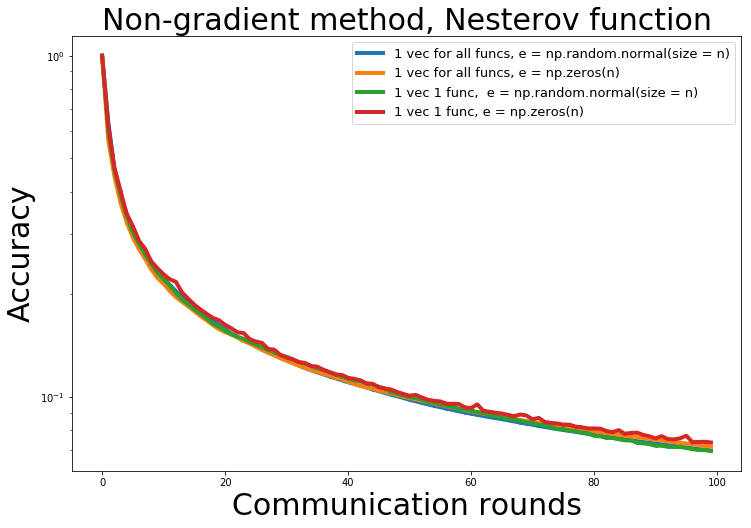

In [12]:
plt.figure(figsize=(12, 8))
plt.semilogy(x1_n, y1_n, linewidth = 4, label = '1 vec for all funcs, e = np.random.normal(size = n)', marker = '.', markersize = 4)
plt.semilogy(x2_n, y2_n, linewidth = 4, label = '1 vec for all funcs, e = np.zeros(n)', marker = '.', markersize = 4)
plt.semilogy(x3_n, y3_n, linewidth = 4, label = '1 vec 1 func,  e = np.random.normal(size = n)', marker = '.', markersize = 4)
plt.semilogy(x4_n, y4_n, linewidth = 4, label = '1 vec 1 func, e = np.zeros(n)', marker = '.', markersize = 4)
plt.legend(loc="best", fontsize=13)
plt.xlabel(r"Communication rounds", fontsize=30)
plt.ylabel(r"Accuracy", fontsize=30)
plt.title(r"Non-gradient method, Nesterov function", fontsize=30)
plt.show()

## Logistic regression function

### Mushrooms dataset

In [52]:
X, y = generate_logreg_dataset('datasets/mushrooms.txt')
y = -2 * y + 3
k = 5
h = 5
communication_rounds = 100
n = X.shape[1]
L = 0.25 * np.max(np.sum(np.square(X), axis=1))
arr_X = np.array_split(X, k)
arr_y = np.array_split(y, k)
w0 = np.zeros(n)

In [53]:
def sigma(w):
    sigm = 0
    for i in range(k):
        sigm += logreg_function(w, arr_X[i], arr_y[i])
    return sigm

In [54]:
params = [(arr_X[j], arr_y[j]) for j in range(k)]

In [56]:
x1_m, y1_m, time_arr1_m = noname_fun_one_to_all(sigma, w0, pseudo_grad_logreg, grad_params = params, method = 'random direction', communication_rounds = 100, n = n, k = k, frq = n * h, lr = 1/L, delta = 0.001)
x2_m, y2_m, time_arr2_m = noname_fun_one_to_all(sigma, w0, pseudo_grad_logreg, grad_params = params, method = 'random coordinate', communication_rounds = 100, n = n, k = k, frq = n * h, lr = 1/L, delta = 0.001)
x3_m, y3_m, time_arr3_m = noname_fun_one_to_one(sigma, w0, pseudo_grad_logreg, grad_params = params, method = 'random direction', communication_rounds = 100, n = n, k = k, frq = n * h, lr = 1/L, delta = 0.001)
x4_m, y4_m, time_arr4_m = noname_fun_one_to_one(sigma, w0, pseudo_grad_logreg, grad_params = params, method = 'random coordinate', communication_rounds = 100, n = n, k = k, frq = n * h, lr = 1/L, delta = 0.001)
xgd_m, ygd_m, time_arrgd_m = gradient_descent(sigma, w0, params, communication_rounds, n, k, h, L)

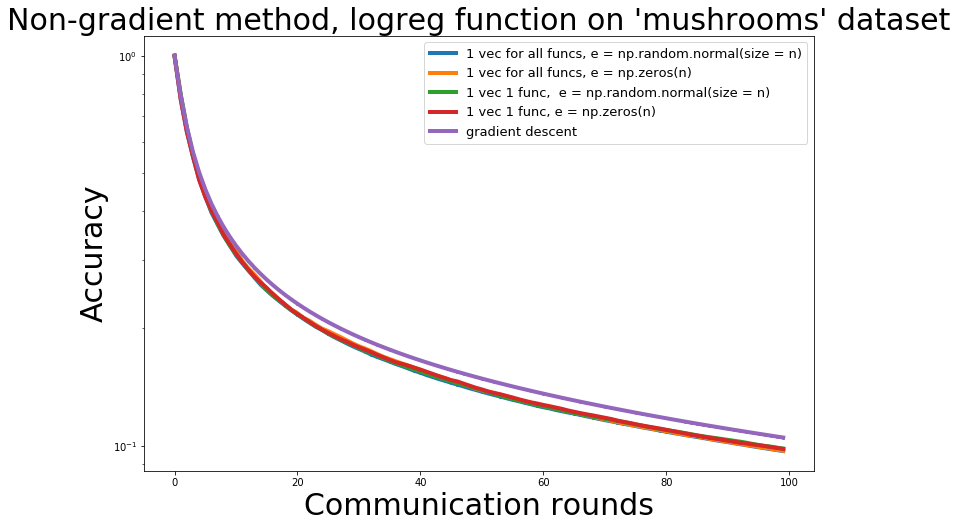

In [57]:
plt.figure(figsize=(12, 8))
plt.semilogy(x1_m, y1_m, linewidth = 4, label = '1 vec for all funcs, e = np.random.normal(size = n)', marker = '.', markersize = 4)
plt.semilogy(x2_m, y2_m, linewidth = 4, label = '1 vec for all funcs, e = np.zeros(n)', marker = '.', markersize = 4)
plt.semilogy(x3_m, y3_m, linewidth = 4, label = '1 vec 1 func,  e = np.random.normal(size = n)', marker = '.', markersize = 4)
plt.semilogy(x4_m, y4_m, linewidth = 4, label = '1 vec 1 func, e = np.zeros(n)', marker = '.', markersize = 4)
plt.semilogy(xgd_m, ygd_m, linewidth = 4, label = 'gradient descent', marker = '.', markersize = 4)
plt.legend(loc="best", fontsize=13)
plt.xlabel(r"Communication rounds", fontsize=30)
plt.ylabel(r"Accuracy", fontsize=30)
plt.title(r"Non-gradient method, logreg function on 'mushrooms' dataset", fontsize=30)
plt.show()

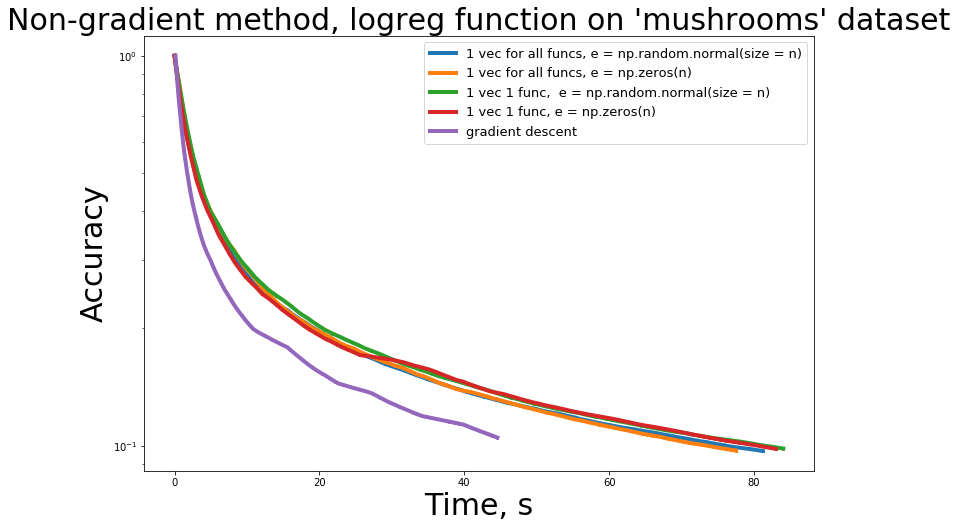

In [58]:
plt.figure(figsize=(12, 8))
plt.semilogy(time_arr1_m, y1_m, linewidth = 4, label = '1 vec for all funcs, e = np.random.normal(size = n)', marker = '.', markersize = 4)
plt.semilogy(time_arr2_m, y2_m, linewidth = 4, label = '1 vec for all funcs, e = np.zeros(n)', marker = '.', markersize = 4)
plt.semilogy(time_arr3_m, y3_m, linewidth = 4, label = '1 vec 1 func,  e = np.random.normal(size = n)', marker = '.', markersize = 4)
plt.semilogy(time_arr4_m, y4_m, linewidth = 4, label = '1 vec 1 func, e = np.zeros(n)', marker = '.', markersize = 4)
plt.semilogy(time_arrgd_m, ygd_m, linewidth = 4, label = 'gradient descent', marker = '.', markersize = 4)
plt.legend(loc="best", fontsize=13)
plt.xlabel(r"Time, s", fontsize=30)
plt.ylabel(r"Accuracy", fontsize=30)
plt.title(r"Non-gradient method, logreg function on 'mushrooms' dataset", fontsize=30)
plt.show()

### German numbers dataset

In [20]:
X, y = generate_logreg_dataset('datasets/german.numer_scale.txt')
k = 5
h = 5
communication_rounds = 100
n = X.shape[1]
L = 0.25 * np.max(np.sum(np.square(X), axis=1))
arr_X = np.array_split(X, k)
arr_y = np.array_split(y, k)
w0 = np.zeros(n)

In [21]:
def sigma(w):
    sigm = 0
    for i in range(k):
        sigm += logreg_function(w, arr_X[i], arr_y[i])
    return sigm

In [22]:
params = [(arr_X[j], arr_y[j]) for j in range(k)]

In [23]:
x1_g, y1_g, time_arr1_g = noname_fun_one_to_all(sigma, w0, pseudo_grad_logreg, grad_params = params, method = 'random direction', communication_rounds = 100, n = n, k = k, frq = n * h, lr = 1/L, delta = 0.001)
x2_g, y2_g, time_arr2_g = noname_fun_one_to_all(sigma, w0, pseudo_grad_logreg, grad_params = params, method = 'random coordinate', communication_rounds = 100, n = n, k = k, frq = n * h, lr = 1/L, delta = 0.001)
x3_g, y3_g, time_arr3_g = noname_fun_one_to_one(sigma, w0, pseudo_grad_logreg, grad_params = params, method = 'random direction', communication_rounds = 100, n = n, k = k, frq = n * h, lr = 1/L, delta = 0.001)
x4_g, y4_g, time_arr4_g = noname_fun_one_to_one(sigma, w0, pseudo_grad_logreg, grad_params = params, method = 'random coordinate', communication_rounds = 100, n = n, k = k, frq = n * h, lr = 1/L, delta = 0.001)
xgd_g, ygd_g, time_arrgd_g = gradient_descent(sigma, w0, params, communication_rounds, n, k, h, L)

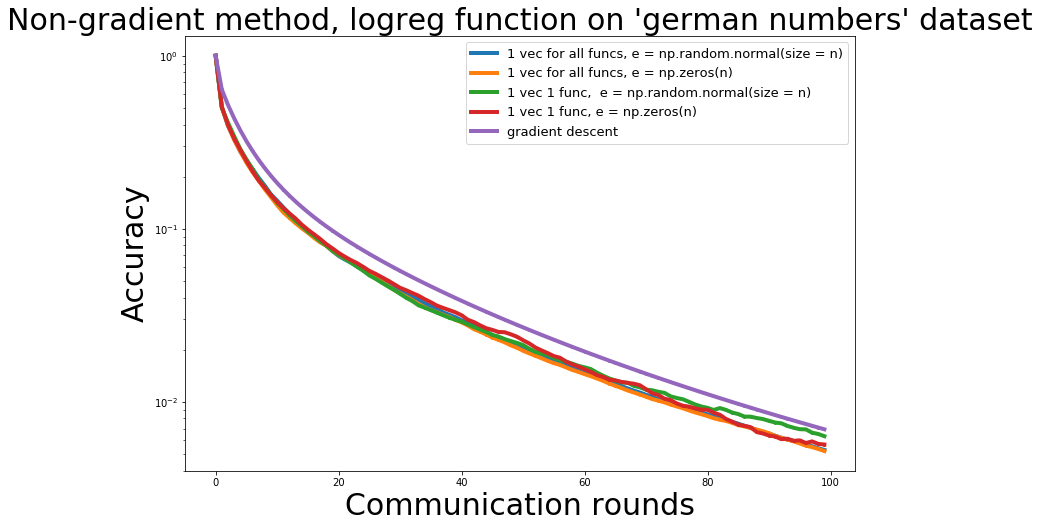

In [24]:
plt.figure(figsize=(12, 8))
plt.semilogy(x1_g, y1_g, linewidth = 4, label = '1 vec for all funcs, e = np.random.normal(size = n)', marker = '.', markersize = 4)
plt.semilogy(x2_g, y2_g, linewidth = 4, label = '1 vec for all funcs, e = np.zeros(n)', marker = '.', markersize = 4)
plt.semilogy(x3_g, y3_g, linewidth = 4, label = '1 vec 1 func,  e = np.random.normal(size = n)', marker = '.', markersize = 4)
plt.semilogy(x4_g, y4_g, linewidth = 4, label = '1 vec 1 func, e = np.zeros(n)', marker = '.', markersize = 4)
plt.semilogy(xgd_g, ygd_g, linewidth = 4, label = 'gradient descent', marker = '.', markersize = 4)
plt.legend(loc="best", fontsize=13)
plt.xlabel(r"Communication rounds", fontsize=30)
plt.ylabel(r"Accuracy", fontsize=30)
plt.title(r"Non-gradient method, logreg function on 'german numbers' dataset", fontsize=30)
plt.show()

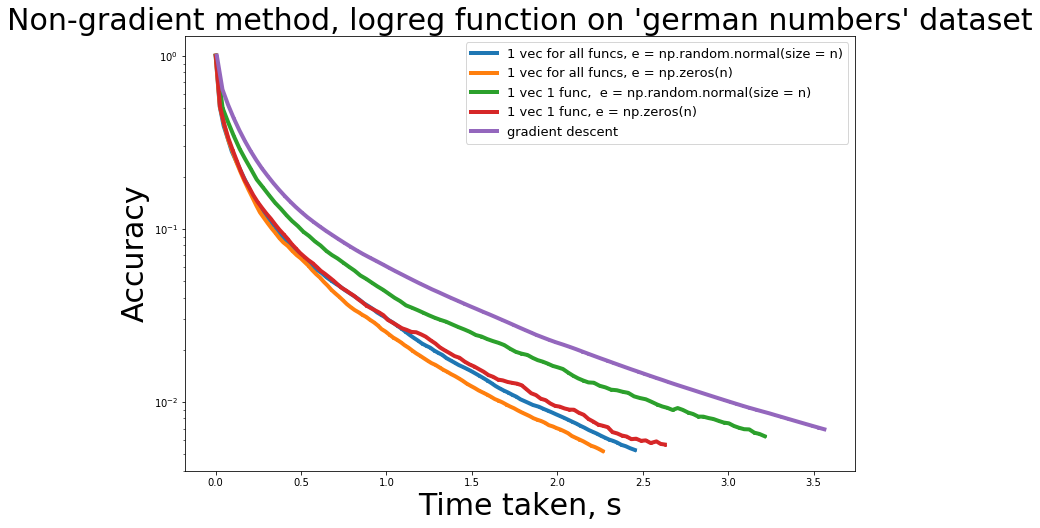

In [61]:
plt.figure(figsize=(12, 8))
plt.semilogy(time_arr1_g, y1_g, linewidth = 4, label = '1 vec for all funcs, e = np.random.normal(size = n)', marker = '.', markersize = 4)
plt.semilogy(time_arr2_g, y2_g, linewidth = 4, label = '1 vec for all funcs, e = np.zeros(n)', marker = '.', markersize = 4)
plt.semilogy(time_arr3_g, y3_g, linewidth = 4, label = '1 vec 1 func,  e = np.random.normal(size = n)', marker = '.', markersize = 4)
plt.semilogy(time_arr4_g, y4_g, linewidth = 4, label = '1 vec 1 func, e = np.zeros(n)', marker = '.', markersize = 4)
plt.semilogy(time_arrgd_g, ygd_g, linewidth = 4, label = 'gradient descent', marker = '.', markersize = 4)
plt.legend(loc="best", fontsize=13)
plt.xlabel(r"Time taken, s", fontsize=30)
plt.ylabel(r"Accuracy", fontsize=30)
plt.title(r"Non-gradient method, logreg function on 'german numbers' dataset", fontsize=30)
plt.show()

### a5a dataset

In [59]:
X, y = generate_logreg_dataset('datasets/a5a.txt')
k = 5
h = 5
communication_rounds = 100
n = X.shape[1]
L = 0.25 * np.max(np.sum(np.square(X), axis=1))
arr_X = np.array_split(X, k)
arr_y = np.array_split(y, k)
w0 = np.zeros(n)
n_batches = 5

In [27]:
def sigma(w):
    sigm = 0
    for i in range(k):
        sigm += logreg_function(w, arr_X[i], arr_y[i])
    return sigm

In [28]:
params = [(arr_X[j], arr_y[j]) for j in range(k)] 

In [29]:
x1_a, y1_a, time_arr1_a = noname_fun_one_to_all(sigma, w0, pseudo_grad_logreg, grad_params = params, method = 'random direction', communication_rounds = 100, n = n, k = k, frq = n * h, lr = 1/L, delta = 0.001)
x2_a, y2_a, time_arr2_a = noname_fun_one_to_all(sigma, w0, pseudo_grad_logreg, grad_params = params, method = 'random coordinate', communication_rounds = 100, n = n, k = k, frq = n * h, lr = 1/L, delta = 0.001)
x3_a, y3_a, time_arr3_a = noname_fun_one_to_one(sigma, w0, pseudo_grad_logreg, grad_params = params, method = 'random direction', communication_rounds = 100, n = n, k = k, frq = n * h, lr = 1/L, delta = 0.001)
x4_a, y4_a, time_arr4_a = noname_fun_one_to_one(sigma, w0, pseudo_grad_logreg, grad_params = params, method = 'random coordinate', communication_rounds = 100, n = n, k = k, frq = n * h, lr = 1/L, delta = 0.001)
xgd_a, ygd_a, time_arrgd_a = gradient_descent(sigma, w0, params, communication_rounds, n, k, h, L)

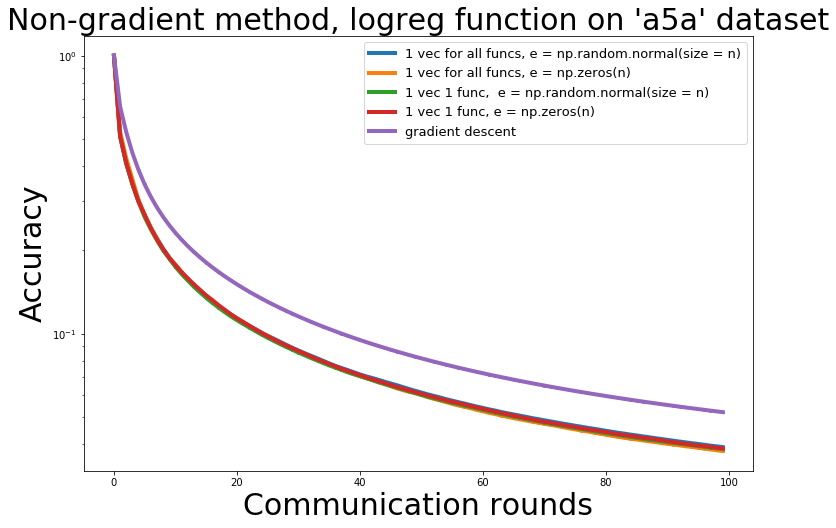

In [30]:
plt.figure(figsize=(12, 8))
plt.semilogy(x1_a, y1_a, linewidth = 4, label = '1 vec for all funcs, e = np.random.normal(size = n)', marker = '.', markersize = 4)
plt.semilogy(x2_a, y2_a, linewidth = 4, label = '1 vec for all funcs, e = np.zeros(n)', marker = '.', markersize = 4)
plt.semilogy(x3_a, y3_a, linewidth = 4, label = '1 vec 1 func,  e = np.random.normal(size = n)', marker = '.', markersize = 4)
plt.semilogy(x4_a, y4_a, linewidth = 4, label = '1 vec 1 func, e = np.zeros(n)', marker = '.', markersize = 4)
plt.semilogy(xgd_a, ygd_a, linewidth = 4, label = 'gradient descent', marker = '.', markersize = 4)
plt.legend(loc="best", fontsize=13)
plt.xlabel(r"Communication rounds", fontsize=30)
plt.ylabel(r"Accuracy", fontsize=30)
plt.title(r"Non-gradient method, logreg function on 'a5a' dataset", fontsize=30)
plt.show()

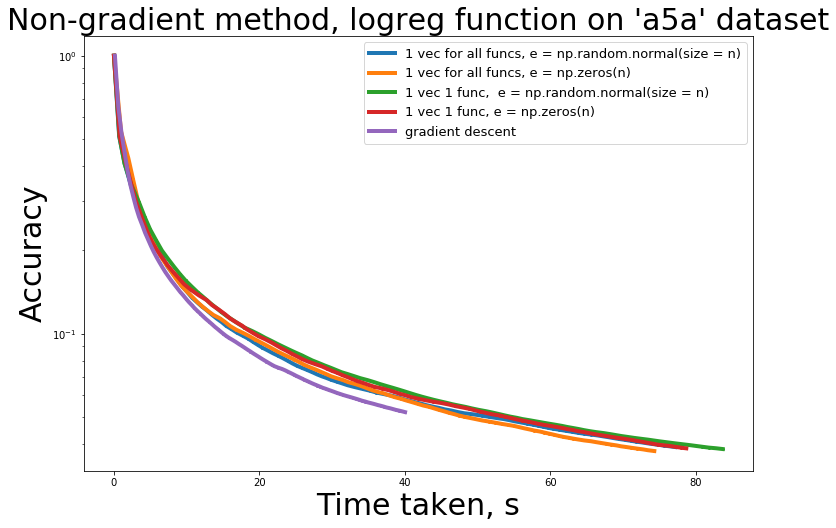

In [63]:
plt.figure(figsize=(12, 8))
plt.semilogy(time_arr1_a, y1_a, linewidth = 4, label = '1 vec for all funcs, e = np.random.normal(size = n)', marker = '.', markersize = 4)
plt.semilogy(time_arr2_a, y2_a, linewidth = 4, label = '1 vec for all funcs, e = np.zeros(n)', marker = '.', markersize = 4)
plt.semilogy(time_arr3_a, y3_a, linewidth = 4, label = '1 vec 1 func,  e = np.random.normal(size = n)', marker = '.', markersize = 4)
plt.semilogy(time_arr4_a, y4_a, linewidth = 4, label = '1 vec 1 func, e = np.zeros(n)', marker = '.', markersize = 4)
plt.semilogy(time_arrgd_a, ygd_a, linewidth = 4, label = 'gradient descent', marker = '.', markersize = 4)
plt.legend(loc="best", fontsize=13)
plt.xlabel(r"Time taken, s", fontsize=30)
plt.ylabel(r"Accuracy", fontsize=30)
plt.title(r"Non-gradient method, logreg function on 'a5a' dataset", fontsize=30)
plt.show()

## Batches

In [32]:
x_batch, y_batch, time_batch = zo_local_sgd_one_to_all(sigma, w0, pseudo_grad_logreg, params, method = 'random direction', n_batches = 1000, communication_rounds = 100, n = n, k = 5, frq = n * h, lr = 1/L, delta = 0.001)   

In [33]:
x_batch_grad, y_batch_grad, time_batch_grad = s_gradient_descent(sigma, w0, params, n_batches = 1000, communication_rounds = 100, n = n, k = 5, h = 5, L = L)

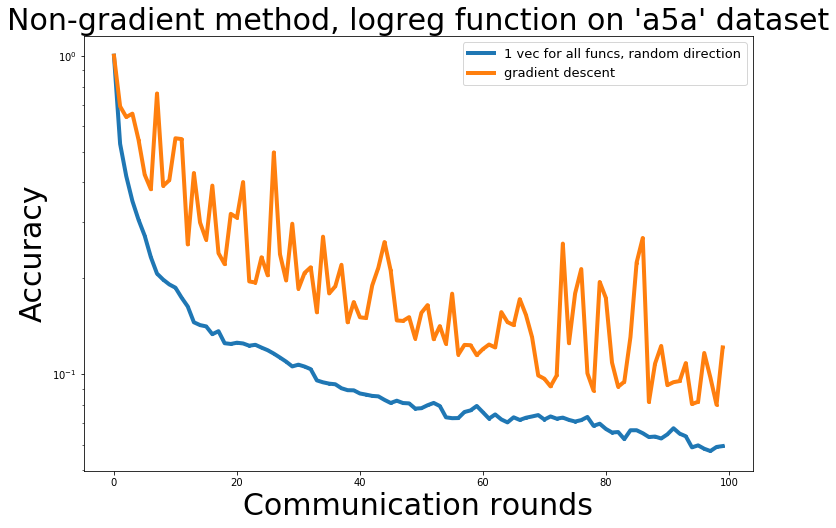

In [34]:
plt.figure(figsize=(12, 8))
plt.semilogy(x_batch, y_batch, linewidth = 4, label = '1 vec for all funcs, random direction', marker = '.', markersize = 4) 
plt.semilogy(x_batch_grad, y_batch_grad, linewidth = 4, label = 'gradient descent', marker = '.', markersize = 4) 
plt.legend(loc="best", fontsize=13)
plt.xlabel(r"Communication rounds", fontsize=30)
plt.ylabel(r"Accuracy", fontsize=30)
plt.title(r"Non-gradient method, logreg function on 'a5a' dataset", fontsize=30)
plt.show()

## Different frequencies

In [35]:
y_h = []
time_arr_h = []
for t in range(6):
    h = 2 ** t
    x, y_i, time_i = noname_fun_one_to_one(sigma, w0, pseudo_grad_logreg, grad_params = params, method = 'random coordinate', communication_rounds = 100, n = n, k = k, frq = n * h, lr = 1/L, delta = 0.001)
    y_h.append(y_i)
    time_arr_h.append(time_i)

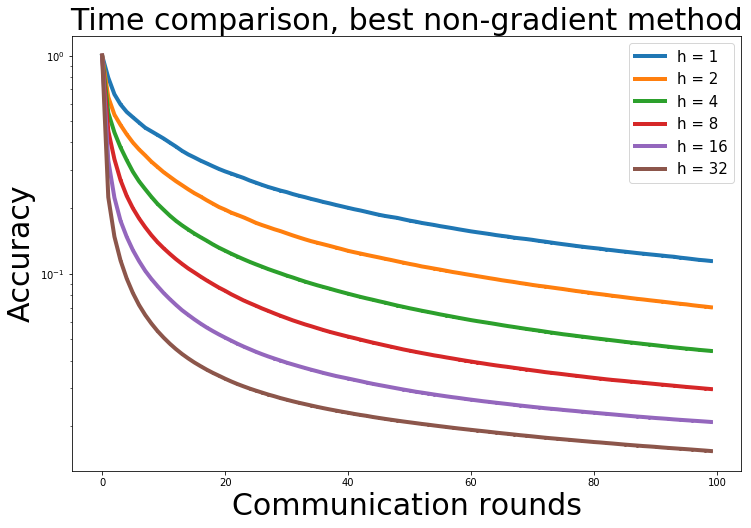

In [36]:
plt.figure(figsize=(12, 8))
for i in range(6):
    plt.semilogy(x, y_h[i], linewidth = 4, label = 'h = ' + str(2**i), marker = '.', markersize = 4)

plt.legend(loc="best", fontsize=15)
plt.xlabel(r"Communication rounds", fontsize=30)
plt.ylabel(r"Accuracy", fontsize=30)
plt.title(r"Time comparison, best non-gradient method", fontsize=30)
plt.show()

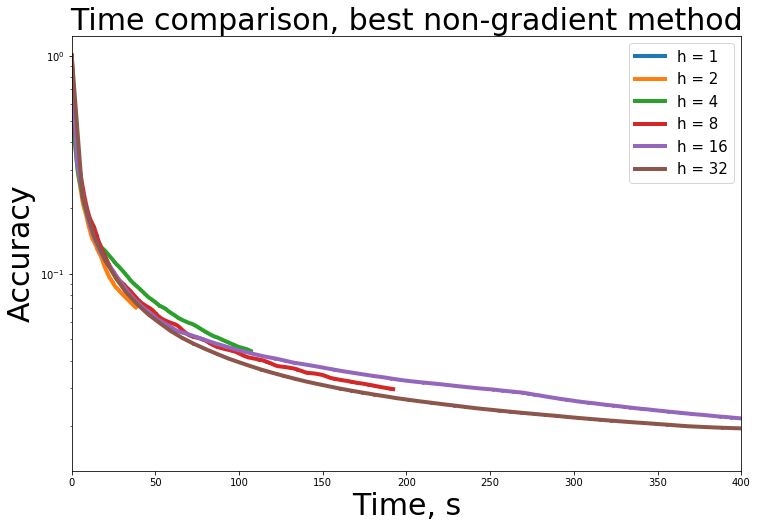

In [38]:
plt.figure(figsize=(12, 8))
for i in range(6):
    plt.semilogy(time_arr_h[i], y_h[i], linewidth = 4, label = 'h = ' + str(2**i), marker = '.', markersize = 4)

plt.legend(loc="best", fontsize=15)
plt.xlabel(r"Time, s", fontsize=30)
plt.ylabel(r"Accuracy", fontsize=30)
plt.title(r"Time comparison, best non-gradient method", fontsize=30)
pylab.xlim(0, 400)
plt.show()